# <center> Depth of Customer Relationship </center>
#    <center> Using Recency, Frequency and Monetary Value </center>

It is common for businesses to want to know the value of a customer to the business and potential income they can generate. There are many metrics to measure these interests. One technique that has gained popularity is RFM.

In this class, we will categorize customers using the RFM technique and create clusters using KMeans algorithm for unsupervised learning

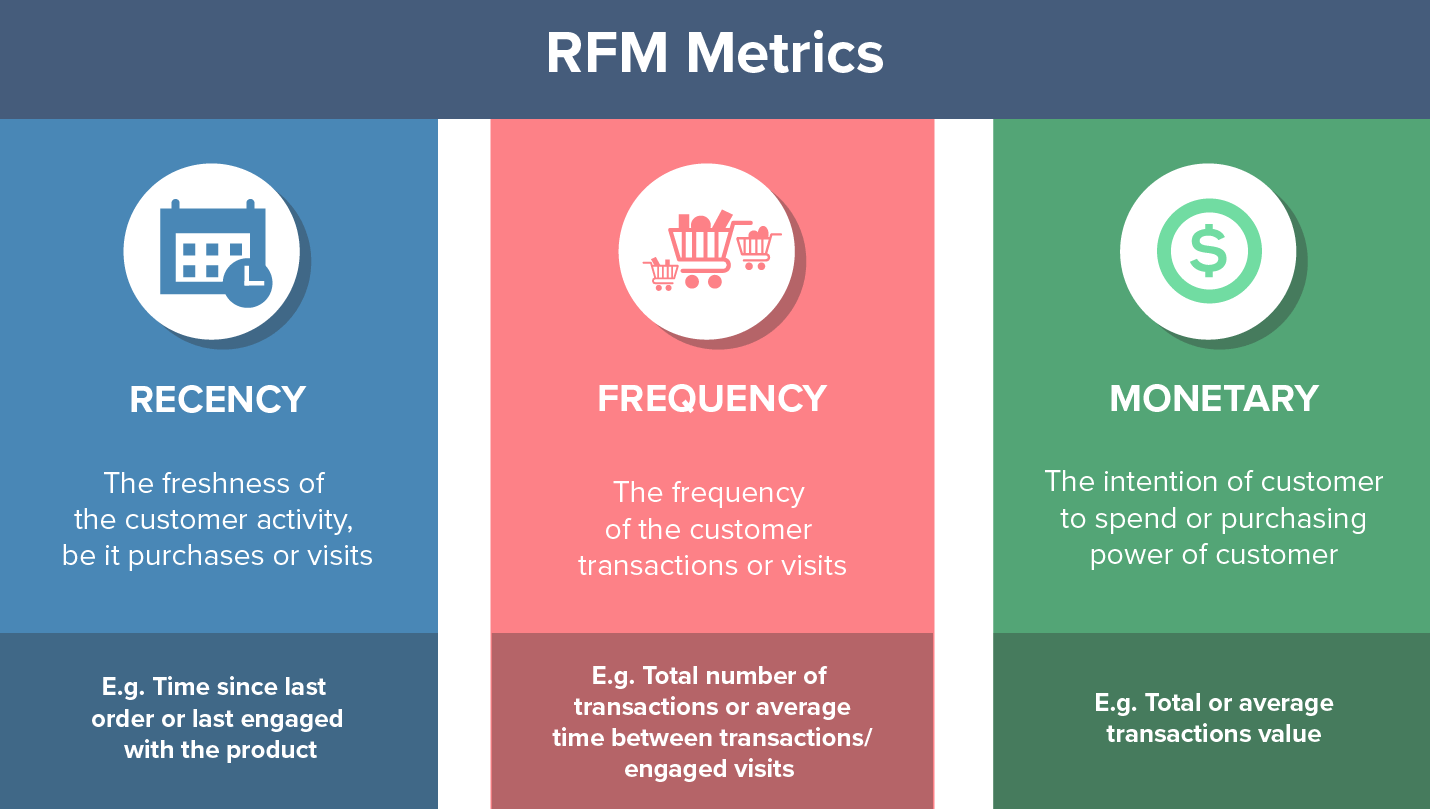

* Recency: sales people desire to always be 'in the face' of the customer. In a way, recency shows that you're at the top of your customer's mind.

* Frequency: businesses like repeat purchases. Many businesses are sustained by returning customers. Companies built around subscription models come to mind. This is why many companies reward customer loyalty.

* Monetary Value: This measures your share of the customer's wallet.

In [1]:
#import necessary libraries
import pandas as pd

#notice that we import KMeans which will be used to create clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the retail sales dataset into a dataframe
data = pd.read_csv('OnlineRetail.csv',encoding='unicode-escape')

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#let's drop rows with NaN customer IDs
#we'll use notna() to keep rows that have a customer ID
#During our EDA class, we assumed that these customers are those who do guest checkout online

data = data[data.CustomerID.notna()]

In [6]:
#TODO: create SaleValue column by multiplying Quantity and UnitPrice columns

data['SaleValue'] = data.Quantity * data.UnitPrice #your code here

#check the result:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
#TODO: convert InvoiceDate to datetime type
#your code should be like data[date_column_name] = pd.to_datetime(data[date_column_name])
#we're doing this so that we can subtract dates properly

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])#your code here


#check the result:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   SaleValue    406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
#run this cell to remove decimals in customer ID and change data type to string
data['CustomerID'] = data.CustomerID.astype('Int64').astype(str)

In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Calculate Recency

We'll use the max date on the dataset to calculate recency of each customer purchase.

Your code will look like `df.date_column_name.max()`

In [11]:
#TODO: what is the most recent date in the entire data set
#we're going to use this to calculate recency for all customers

#your code here
data.InvoiceDate.max()


Timestamp('2011-12-09 12:50:00')

Group customer IDs by their most recent dates

Your code will look like `df.groupby(customer_id_column).date_column.max()`

In [12]:
#group customer IDs by their most recent dates
#Your code here:
data.groupby('CustomerID').InvoiceDate.max()


CustomerID
12346   2011-01-18 10:17:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-12-02 11:43:00
18283   2011-12-06 12:02:00
18287   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

We are going to create a data frame with recency, frequency and monetary value information. It will contain all customer IDs, then columns for each of recency, frequency and monetary value, pertaining to each customer ID. It will look like this:

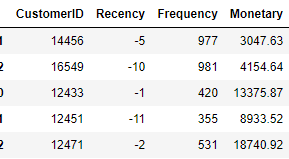

Our approach is as follows:
* calculate recency, frequency and monetary value, and save each to a separate series object.
* merge all these series into one dataframe such that each series becomes an independent column in the dataset
* ensure to name each series (using the name attribute of a series) so that the series name becomes the column name. Refer to your introduction to pandas notes or pop out series documentation to reconfirm how to rename a series.

By the time we would have finished creating the clusters out of the RFM information already generated, the result would look like this:

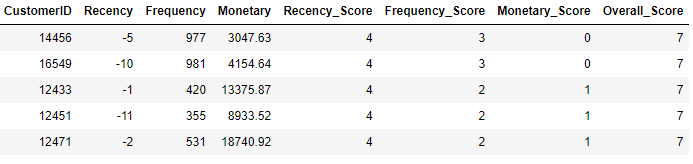

In [13]:
#create a series for recency

recency = data.groupby('CustomerID').InvoiceDate.max()
recency.head()

CustomerID
12346   2011-01-18 10:17:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [14]:
#calculate recency days by substracting each date from the max purchase date in the dataset

recency = recency - data.InvoiceDate.max()

#view top rows to see what you've done
#we're using these negatives so that during clustering, lower numbers will have lower scores
recency.head(2)

CustomerID
12346   -326 days +21:27:00
12347     -2 days +03:02:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [15]:
#extract only number of days portion from recency values

recency = recency.dt.days

#view top rows to see what you've done
recency.head(2)

CustomerID
12346   -326
12347     -2
Name: InvoiceDate, dtype: int64

#### TODO: rename series to recency so that we can use that name as a column name for the RFM DataFrame we will create

Your code will look like `series.rename(new_name,inplace=True)`

The new name will be 'Recency'.

*Take note that you are changing the `name` parameter of the series, not the variable name*

In [16]:
#your code here. name it 'Recency'

recency.rename('Recency',inplace=True)

CustomerID
12346   -326
12347     -2
12348    -75
12349    -19
12350   -310
        ... 
18280   -278
18281   -181
18282     -8
18283     -4
18287    -43
Name: Recency, Length: 4372, dtype: int64

In [17]:
#create a new DataFrame called 'RFM' using the recency series as the data for this dataframe.
#refer to your pandas class notes, or pop out documentation, to refresh your memory on how to create a dataframe from another object
import pandas as pd

RFM = pd.DataFrame(recency)#your code here

#check what you've created
RFM.head(5)

,Recency
CustomerID,
12346,-326
12347,-2
12348,-75
12349,-19
12350,-310


In [18]:
#pop out CustomerID to become a column. 
#we don't want it to be an index because we'll play with indexes during clustering
RFM.reset_index(inplace=True)
RFM.head(5)

,CustomerID,Recency
0,12346,-326
1,12347,-2
2,12348,-75
3,12349,-19
4,12350,-310


In [19]:
# View summary statistics 
RFM.describe()

,Recency
count,4372.000000
mean,-92.043001
std,100.765435
min,-374.000000
25%,-143.000000
50%,-50.000000
75%,-17.000000
max,0.000000


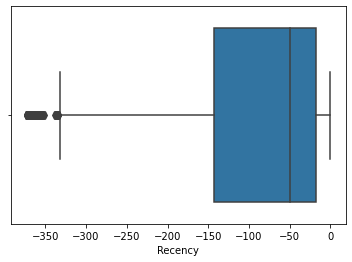

In [20]:
#plot Recency data with boxplot
sns.boxplot(x='Recency',data=RFM)

plt.show()

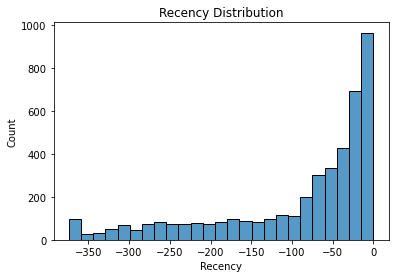

In [21]:
#plot recency data with histogram
sns.histplot(data=RFM['Recency'])
plt.title('Recency Distribution')

plt.show()

### The recency distribution is negatively skewed

## Calculate Frequency

In [22]:
#check recency counts
data.groupby('CustomerID').CustomerID.count()


CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Name: CustomerID, Length: 4372, dtype: int64

In [23]:
#TODO: create series with variable name 'frequency' using the aggregated counts per customer ID above
#your code here:
frequency = data.groupby('CustomerID').CustomerID.count()
frequency.head()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
Name: CustomerID, dtype: int64

In [24]:
#TODO: rename the series to 'Frequency' with a capital F. Note: you're not renaming the variable name but the series name 
#your code here
'''To rename the series, we have to use the function .rename'''

frequency.rename('Frequency', inplace=True)

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Name: Frequency, Length: 4372, dtype: int64

In [25]:
#Merge this frequency series into the RFM dataframe
#rename the series inline
RFM = RFM.merge(frequency,on='CustomerID')

RFM.head(5)

,CustomerID,Recency,Frequency
0,12346,-326,2
1,12347,-2,182
2,12348,-75,31
3,12349,-19,73
4,12350,-310,17


In [26]:
# View summary statistics for frequency
RFM.describe()

,Recency,Frequency
count,4372.000000,4372.000000
mean,-92.043001,93.053294
std,100.765435,232.471608
min,-374.000000,1.000000
25%,-143.000000,17.000000
50%,-50.000000,42.000000
75%,-17.000000,102.000000
max,0.000000,7983.000000


(0.0, 300.0)

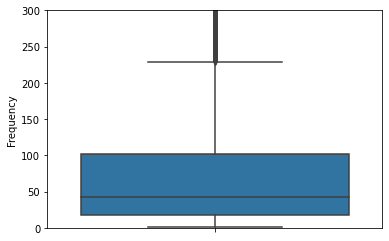

In [27]:
sns.boxplot(y='Frequency',data=RFM)
plt.ylim(0,300)

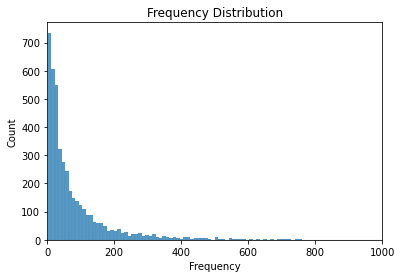

In [28]:
sns.histplot(data=RFM['Frequency'])
plt.title('Frequency Distribution')
plt.xlim(0,1000)
plt.show()

The frequency distribution displays a positive skewness

## Calculate Monetary Value

In [29]:
#check monetary values
data.groupby('CustomerID').SaleValue.sum()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: SaleValue, Length: 4372, dtype: float64

In [30]:
#TODO: create series with variable name 'monetary' using the aggregated sale value sums per customer ID above
#your code here:
monetary = data.groupby('CustomerID').SaleValue.sum()
monetary.head()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
Name: SaleValue, dtype: float64

In [31]:
#TODO: rename the series to 'Monetary' with a capital M. Note: you're not renaming the variable name but the series name 
#your code here
monetary.rename('Monetary', inplace=True)

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: Monetary, Length: 4372, dtype: float64

In [32]:
#Merge this monetary series into the RFM dataframe
#rename the series inline
RFM = RFM.merge(monetary,on='CustomerID')

RFM.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346,-326,2,0.00
1,12347,-2,182,4310.00
2,12348,-75,31,1797.24
3,12349,-19,73,1757.55
4,12350,-310,17,334.40


In [33]:
#why do some people have monetary values of 0
#check with a sample
data[data.CustomerID=='12346']



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6


In [34]:
#customers who made returns
data[data.CustomerID=='12350']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350,Norway,25.2
80324,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02 16:01:00,2.10,12350,Norway,25.2
80325,543037,79066K,RETRO MOD TRAY,10,2011-02-02 16:01:00,0.85,12350,Norway,8.5
80326,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-02-02 16:01:00,0.85,12350,Norway,10.2
80327,543037,22348,TEA BAG PLATE RED RETROSPOT,24,2011-02-02 16:01:00,0.85,12350,Norway,20.4
80328,543037,84086C,PINK/PURPLE RETRO RADIO,6,2011-02-02 16:01:00,2.95,12350,Norway,17.7
80329,543037,22551,PLASTERS IN TIN SPACEBOY,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8
80330,543037,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8
80331,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350,Norway,19.8
80332,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350,Norway,15.0


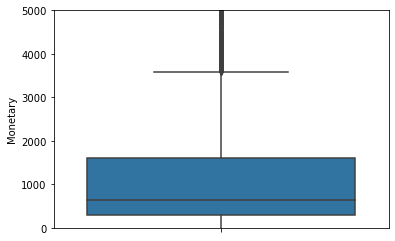

In [35]:
sns.boxplot(y='Monetary',data=RFM)

plt.ylim(0,5000)
plt.show()

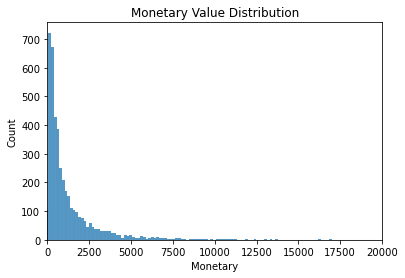

In [36]:
sns.histplot(data=RFM['Monetary'])
plt.title('Monetary Value Distribution')
plt.xlim(0,20000)
plt.show()

In [37]:
monetary.info

<bound method Series.info of CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: Monetary, Length: 4372, dtype: float64>

## Clustering with KMeans

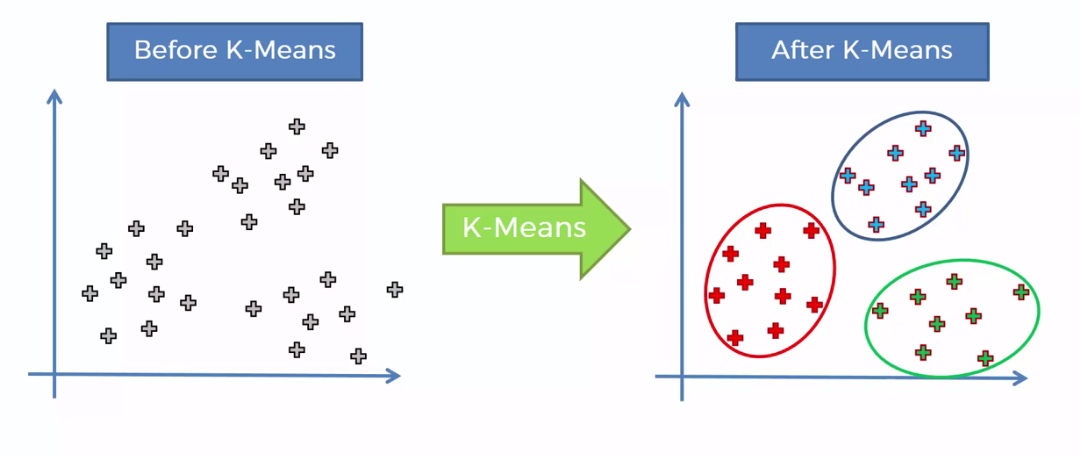

In [38]:
#let's set up KMeans to create 5 clusters
kmeans = KMeans(n_clusters=3,random_state=1)

In [39]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    '''
    This function is used to create a consistent order for the cluster numbers 
    that will be the output of the KMeans prediction.
    
    Parameters:
    cluster_field_name: str, name to be assigned to the cluster we are predicting for
    target_field_name: str, name of the column we're clustering 
    df: DataFrame, source of the data where prediction is to be done
    ascending: bool, order of cluster numbers
    '''
    #create column names using a prefix
    new_cluster_field_name = 'new_' + cluster_field_name
    
    #get mean value for the target column name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    #sort mean values in ascending order
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    
    #create an index
    df_new['index'] = df_new.index
    
    #merge the new dataframe with old dataframe
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    
    #remove the old column
    df_final = df_final.drop([cluster_field_name],axis=1)
    
    #rename the index as the metric score we want
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

### Recency Clusters

In [40]:
#fit the model
kmeans.fit(RFM[['Recency']])

KMeans(n_clusters=3, random_state=1)

In [41]:
#predict clusters
recency_labels = kmeans.predict(RFM[['Recency']])

In [42]:
#view the unique cluster labels
#by using a set, we ignore the repeatitions and return only unique values. Notice that the labels correspond to the
#number of clusters you set in your n_clusters parameter when you initialized KMeans

set(recency_labels)

{0, 1, 2}

In [43]:
#add clusters to our dataframe
RFM['Recency_Score'] = recency_labels

In [44]:
#reorder clusters to be sequential
RFM = order_cluster('Recency_Score', 'Recency',RFM,True)

In [45]:
#view summary statistics
RFM.groupby('Recency_Score').Recency.describe()

,count,mean,std,min,25%,50%,75%,max
Recency_Score,,,,,,,,
0,634.0,-295.367508,45.420579,-374.0,-330.0,-288.0,-257.00,-225.0
1,816.0,-152.530637,38.494159,-223.0,-185.0,-151.0,-117.00,-92.0
2,2922.0,-31.034908,24.802171,-91.0,-50.0,-24.0,-9.25,0.0


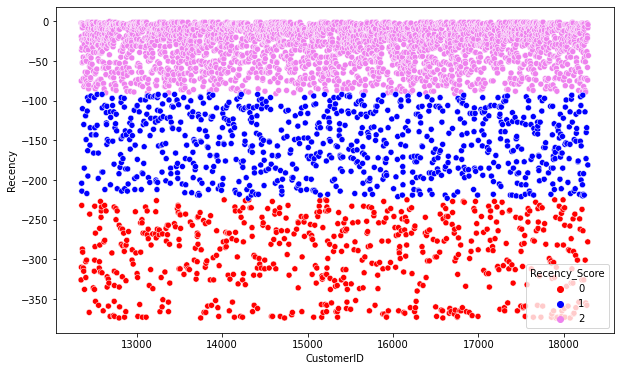

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=RFM.CustomerID.astype(int),y='Recency',hue='Recency_Score',data=RFM,palette=['red','blue','violet'])

plt.show()

### Frequency Clusters

In [49]:
#fit model
kmeans.fit(RFM[['Frequency']])

#predict clusters
frequency_labels = kmeans.predict(RFM[['Frequency']])

#save clusters in the data frame. Replace 'pass' in the line below
RFM['Frequency_Score'] = frequency_labels

#order the clusters. Replace 'pass' in the line below
RFM = order_cluster('Frequency_Score', 'Frequency',RFM,True)

#view details of clusters
RFM.groupby('Frequency_Score').Frequency.describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Score,,,,,,,,
0,4108.0,60.693525,61.781879,1.0,16.00,37.5,86.00,287.0
1,260.0,514.784615,328.508904,289.0,336.75,414.0,547.25,2782.0
2,4.0,5914.000000,1473.845537,4642.0,5006.50,5515.5,6423.00,7983.0


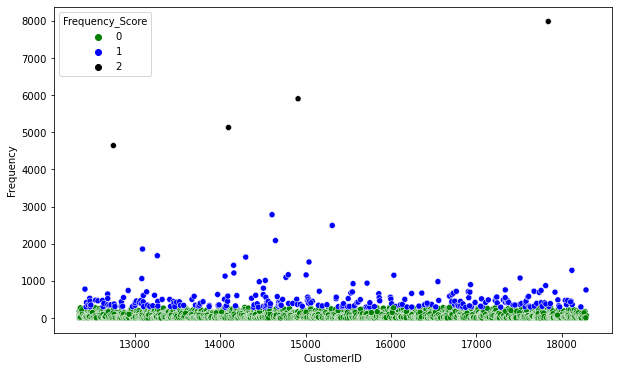

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=RFM.CustomerID.astype(int),y='Frequency',hue='Frequency_Score',data=RFM,palette=['green','blue','black'])

plt.show()

### Monetary Value Clusters


In [51]:
#fit model
kmeans.fit(RFM[['Monetary']])

#predict clusters
monetary_labels = kmeans.predict(RFM[['Monetary']])

#save clusters in the data frame. Replace 'pass' in the line below
RFM['Monetary_Score'] = monetary_labels

#order clusters. replace 'pass' in the line below
RFM = order_cluster('Monetary_Score', 'Monetary',RFM,True)

#view details of clusters
RFM.groupby('Monetary_Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_Score,,,,,,,,
0,4346.0,1434.198064,2434.685315,-4287.63,291.910,642.805,1572.155,29072.10
1,23.0,58418.754348,29262.836683,30300.82,35078.555,51823.720,61036.220,132572.62
2,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.755,279489.02


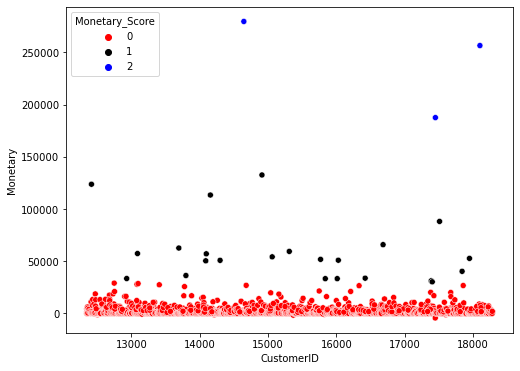

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=RFM.CustomerID.astype(int),y='Monetary',hue='Monetary_Score',data=RFM,palette=['red','black','blue'])

plt.show()

## Calculate Overall RFM Score

In [58]:
#create a sum of the scores 
#use sum(axis=1) to sum horizontally

RFM['Overall_Score'] = RFM[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)
RFM.head(3)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score
0,12346,-326,2,0.0,0,0,0,0
1,12350,-310,17,334.4,0,0,0,0
2,12354,-232,58,1079.4,0,0,0,0


In [59]:
RFM.tail(3)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score
4369,14646,-2,2085,279489.02,2,1,2,5
4370,17450,-8,351,187482.17,2,1,2,5
4371,18102,-1,433,256438.49,2,1,2,5


In [60]:
#check distribution of scores
RFM.Overall_Score.value_counts()

2    2658
1     813
0     633
3     250
4      12
5       6
Name: Overall_Score, dtype: int64

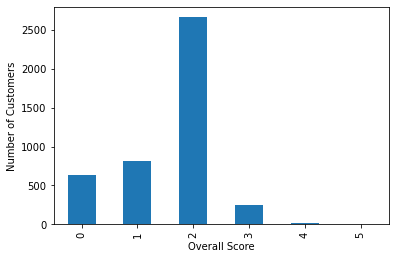

In [61]:
RFM.Overall_Score.value_counts().sort_index().plot.bar()
plt.ylabel('Number of Customers')
plt.xlabel('Overall Score')

plt.show()

In [62]:
RFM.groupby('Overall_Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Overall_Score,,,,,,,,
0,633.0,397.188167,994.078393,-1192.20,141.4100,252.800,409.9800,21535.90
1,813.0,702.336717,945.509391,-4287.63,212.3000,435.020,833.7800,10217.48
2,2658.0,1453.890818,2052.877499,-1165.30,382.0800,833.690,1785.1575,26763.34
3,250.0,7601.324000,8594.220345,1039.58,3044.5175,5334.445,8251.4800,65892.08
4,12.0,63285.764167,30146.745104,29072.10,46899.4725,55807.310,69021.1700,123725.45
5,6.0,158907.331667,99980.809800,40340.78,75983.8375,160027.395,239199.4100,279489.02


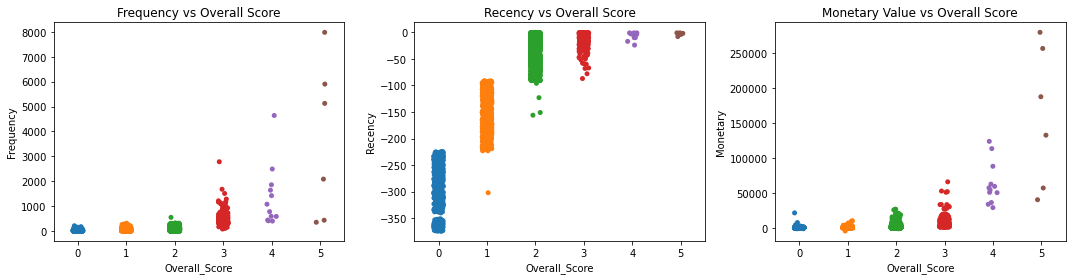

In [63]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0] = sns.stripplot(y='Frequency',x='Overall_Score',data = RFM, ax=ax[0]) #A strip plot is a scatter plot where one of the variables is categorical.
ax[0].set_title('Frequency vs Overall Score')

ax[1] = sns.stripplot(y='Recency',x='Overall_Score',data = RFM, ax=ax[1])
ax[1].set_title('Recency vs Overall Score')

ax[2] = sns.stripplot(y='Monetary',x='Overall_Score',data = RFM, ax=ax[2])
ax[2].set_title('Monetary Value vs Overall Score')

plt.tight_layout()
plt.show()

### Assign Segments?

You can assign segments based on score bands. 

This will help you group customers by each of these segments so as to support business decision making.

In [66]:
#assign segments
RFM['Segment'] = 'Low Value'
RFM.loc[RFM.Overall_Score>1,'Segment'] = 'Mid Value'
RFM.loc[RFM.Overall_Score>4,'Segment'] = 'High Value'

#Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.

In [67]:
'''Pandas Index.value_counts() function returns object containing counts of unique values. 
The resulting object will be in descending order so that the first element is the most frequently-occurring element.'''

RFM.Segment.value_counts()

Mid Value     2920
Low Value     1446
High Value       6
Name: Segment, dtype: int64

In [68]:
#save to csv
RFM.to_csv('RFM_Report.csv', index=False)

In [71]:
#what are the records in one of the scores like
RFM[RFM.Overall_Score==2]


,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score,Segment
633,12347,-2,182,4310.00,2,0,0,2,Mid Value
634,12348,-75,31,1797.24,2,0,0,2,Mid Value
635,12349,-19,73,1757.55,2,0,0,2,Mid Value
636,12352,-36,95,1545.41,2,0,0,2,Mid Value
637,12356,-23,59,2811.43,2,0,0,2,Mid Value
...,...,...,...,...,...,...,...,...,...
3286,18287,-43,70,1837.28,2,0,0,2,Mid Value
4341,13869,-123,307,3104.95,1,1,0,2,Mid Value
4342,16919,-156,327,2596.45,1,1,0,2,Mid Value
4343,17050,-96,316,3228.84,1,1,0,2,Mid Value


In [72]:
#check one person
RFM[RFM.CustomerID=='12346']

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score,Segment
0,12346,-326,2,0.0,0,0,0,0,Low Value


In [73]:
#why do we have records where the total monetary value is negative.
data[data.CustomerID.isin(RFM[RFM.Monetary<0].CustomerID.to_list())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40
...,...,...,...,...,...,...,...,...,...
411728,C572228,22113,GREY HEART HOT WATER BOTTLE,-5,2011-10-21 14:03:00,3.75,15728,United Kingdom,-18.75
411729,C572228,22112,CHOCOLATE HOT WATER BOTTLE,-17,2011-10-21 14:03:00,4.25,15728,United Kingdom,-72.25
411730,C572228,22111,SCOTTIE DOG HOT WATER BOTTLE,-10,2011-10-21 14:03:00,3.45,15728,United Kingdom,-34.50
419485,572832,M,Manual,1,2011-10-26 11:40:00,1.00,16454,United Kingdom,1.00


Campaigns can be targeted to each customer segement depending on what is determined appropriate by the business stakeholders

# Further Study: Optimal Number of Clusters

## Elbow Method

In [74]:
from scipy.spatial.distance import cdist
import numpy as np

In [75]:
#to apply the elbow method to determine number of clusters
#recency
no_of_clusters = range(1,10)
meanDistortions = []

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Recency']])
    clfmodel_pred = clfmodel.predict(RFM[['Recency']])

    meanDistortions.append(sum(np.min(cdist(RFM[['Recency']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Recency']].shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method: Recency')

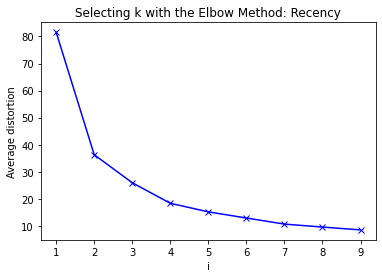

In [76]:
plt.plot(no_of_clusters, meanDistortions, 'bx-')
plt.xlabel('i')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method: Recency')

Text(0.5, 1.0, 'Selecting k with the Elbow Method: Frequency')

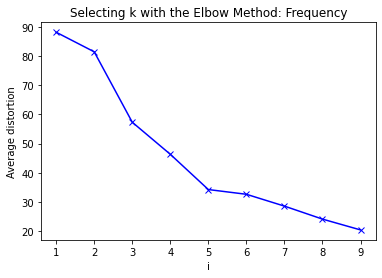

In [77]:
#to apply the elbow method to determine number of clusters
#frequency
no_of_clusters = range(1,10)
meanDistortions = []

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Frequency']])
    clfmodel_pred = clfmodel.predict(RFM[['Frequency']])

    meanDistortions.append(sum(np.min(cdist(RFM[['Frequency']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Frequency']].shape[0])
    
    
    
plt.plot(no_of_clusters, meanDistortions, 'bx-')
plt.xlabel('i')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method: Frequency')    

Text(0.5, 1.0, 'Selecting k with the Elbow Method: Monetary')

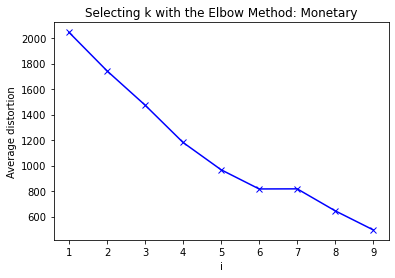

In [78]:
#to apply the elbow method to determine number of clusters
#recency
no_of_clusters = range(1,10)
meanDistortions = []

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Monetary']])
    clfmodel_pred = clfmodel.predict(RFM[['Monetary']])

    meanDistortions.append(sum(np.min(cdist(RFM[['Monetary']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Monetary']].shape[0])
    
    
#plot to find elbow    
plt.plot(no_of_clusters, meanDistortions, 'bx-')
plt.xlabel('i')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method: Monetary')    

## Silhouette Method

In [79]:
from sklearn.metrics import silhouette_score

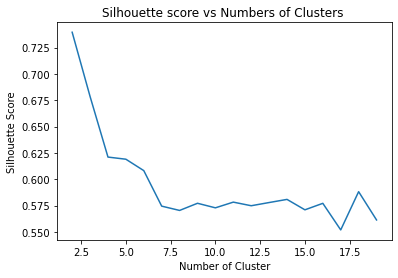

Optimal number :
2


In [80]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Recency']])
    predict = model.predict(RFM[['Recency']])
    silhouette_score(RFM[['Recency']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Recency']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)

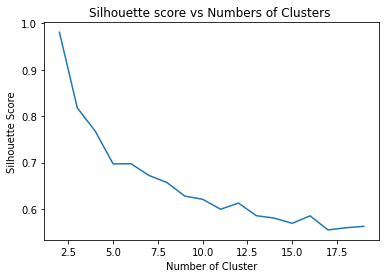

Optimal number :
2


In [81]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Frequency']])
    predict = model.predict(RFM[['Frequency']])
    silhouette_score(RFM[['Frequency']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Frequency']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)

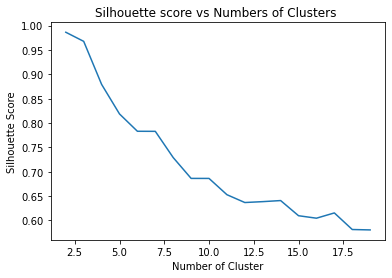

Optimal number :
2


In [82]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Monetary']])
    predict = model.predict(RFM[['Monetary']])
    silhouette_score(RFM[['Monetary']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Monetary']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)